# Data Science Project:

Ali Akhavan Hosseini

Amir Hossein Yousefvand

Mohammad Hossein Nikkhah

### Data Import and Preprocessing :

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Blood pressure is measured in two different states: <br>
<ul>
    <li><b>Systolic Blood Pressure: </b>This is the pressure in your blood vessels when your heart beats. It's the higher of the two numbers in a blood pressure reading. For example, in a reading of 120/80, the systolic pressure is 120 mmHg.
    </li><br/>
    <li><b>Diastolic Blood Pressure: </b>This is the pressure in your blood vessels when your heart rests between beats. It's the lower of the two numbers in a blood pressure reading. For example, in a reading of 120/80, the diastolic pressure is 80 mmHg.
    </li>
</ul>

    
    

In order to measure these two data as independent and valid values, a column is generated for each of them in the following cell:

In [4]:

df[["Blood_Pres_Systolic", "Blood_Pres_Diastolic"]] = df["Blood Pressure"].str.split('/', expand=True)


df["Blood_Pres_Systolic"] = pd.to_numeric(df["Blood_Pres_Systolic"])
df["Blood_Pres_Diastolic"] = pd.to_numeric(df["Blood_Pres_Diastolic"])
df.drop("Blood Pressure", axis=1, inplace=True)

In [5]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Blood_Pres_Systolic                0
Blood_Pres_Diastolic               0
d

In [6]:
df.drop_duplicates(inplace=True)

- patient ID, is obviously something random hence does not give any extra useful information:

In [7]:
df = df.drop('Patient ID', axis=1)

In [8]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Blood_Pres_Systolic,Blood_Pres_Diastolic
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [9]:
len(df['Country'].unique())

20

#### Label Encoding:

- Encoding Nominal features :

Classes in some features do not have any preference or order compared to each other. Thus, it is important not to assign any order to these features while encoding. In order to prevent the false encoding of nominal features, the one-hot encoding method is used.

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['Country', 'Continent', 'Hemisphere'])
    ],
    remainder='passthrough'  # leave other columns unchanged
)

df_transformed = column_transformer.fit_transform(df)
columns_names = column_transformer.get_feature_names_out()

for i in range(len(columns_names)):
    colname = columns_names[i]
    if "remainder__" in colname:
        columns_names[i] = colname.replace("remainder__", "")

df_transformed = pd.DataFrame(df_transformed, columns=columns_names)

df_transformed.head()


,onehot__Country_Argentina,onehot__Country_Australia,onehot__Country_Brazil,onehot__Country_Canada,onehot__Country_China,onehot__Country_Colombia,onehot__Country_France,onehot__Country_Germany,onehot__Country_India,onehot__Country_Italy,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Blood_Pres_Systolic,Blood_Pres_Diastolic
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1.514821,160555,21.809144,231,1,5,0,91,88


- Encoding Ordinal Features :

For ordinal features, on the other hand, the order of numbers that each class obtains as a label is important. Therefore, the encoding of these features is done according to the meaning of the classes for each feature.

In [11]:
gender_mapping = {'Male' : 0, 'Female' : 1}
df_transformed['Sex'] = df_transformed['Sex'].map(gender_mapping)

diet_mapping = {'Unhealthy' : 0, 'Average' : 1, 'Healthy' : 2}
df_transformed['Diet'] = df_transformed['Diet'].map(diet_mapping)


# df_transformed.drop(columns=['Patient ID'], inplace=True)

In [12]:
df_transformed.head()

,onehot__Country_Argentina,onehot__Country_Australia,onehot__Country_Brazil,onehot__Country_Canada,onehot__Country_China,onehot__Country_Colombia,onehot__Country_France,onehot__Country_Germany,onehot__Country_India,onehot__Country_Italy,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Blood_Pres_Systolic,Blood_Pres_Diastolic
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1.514821,160555,21.809144,231,1,5,0,91,88


Although sex is considered a nominal feature in this case, because it has only two classes, it can be labeled like ordinal features.

In [13]:
y = df_transformed['Heart Attack Risk']
x = df_transformed.drop('Heart Attack Risk', axis=1)
x.head()

,onehot__Country_Argentina,onehot__Country_Australia,onehot__Country_Brazil,onehot__Country_Canada,onehot__Country_China,onehot__Country_Colombia,onehot__Country_France,onehot__Country_Germany,onehot__Country_India,onehot__Country_Italy,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood_Pres_Systolic,Blood_Pres_Diastolic
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,9,6.615001,261404,31.251233,286,0,6,158,88
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,4.963459,285768,27.194973,235,1,7,165,93
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,9,9.463426,235282,28.176571,587,4,4,174,99
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,9,7.648981,125640,36.464704,378,3,4,163,100
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6,1.514821,160555,21.809144,231,1,5,91,88


In [14]:
y = y.astype(int)

### Splitting Train and Test sets :

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=25)


### Scaling both train and test sets :

In [16]:
from sklearn.preprocessing import StandardScaler

#Scale the test data
scale_test = StandardScaler()

X_test = pd.DataFrame(scale_test.fit_transform(X_test), columns=x.columns)


#Scale the train data
scale_train = StandardScaler()

X_train = pd.DataFrame(scale_train.fit_transform(X_train), columns=x.columns)



In [17]:
x.head()

,onehot__Country_Argentina,onehot__Country_Australia,onehot__Country_Brazil,onehot__Country_Canada,onehot__Country_China,onehot__Country_Colombia,onehot__Country_France,onehot__Country_Germany,onehot__Country_India,onehot__Country_Italy,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood_Pres_Systolic,Blood_Pres_Diastolic
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,9,6.615001,261404,31.251233,286,0,6,158,88
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,4.963459,285768,27.194973,235,1,7,165,93
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,9,9.463426,235282,28.176571,587,4,4,174,99
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,9,7.648981,125640,36.464704,378,3,4,163,100
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6,1.514821,160555,21.809144,231,1,5,91,88


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

# for name, model in models.items():
#     print(f"Training {name}...")
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{name} Accuracy: {accuracy:.2f}")
#     print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1871
           1       0.00      0.00      0.00      1021

    accuracy                           0.65      2892
   macro avg       0.32      0.50      0.39      2892
weighted avg       0.42      0.65      0.51      2892

Training Decision Tree...


d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined

Decision Tree Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1871
           1       0.35      0.36      0.35      1021

    accuracy                           0.54      2892
   macro avg       0.50      0.50      0.50      2892
weighted avg       0.54      0.54      0.54      2892

Training Random Forest...
Random Forest Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1871
           1       0.34      0.02      0.04      1021

    accuracy                           0.64      2892
   macro avg       0.50      0.50      0.41      2892
weighted avg       0.54      0.64      0.52      2892

Training SVM...
SVM Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.65      1.00      0.78      1871
           1       0.00      0.00      0.00      1021

    accuracy                           0.64      2892
   macro 

d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      1871
           1       0.33      0.03      0.05      1021

    accuracy                           0.64      2892
   macro avg       0.49      0.50      0.41      2892
weighted avg       0.54      0.64      0.52      2892

Training Naive Bayes...
Naive Bayes Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1871
           1       0.36      0.22      0.27      1021

    accuracy                           0.59      2892
   macro avg       0.51      0.50      0.49      2892
weighted avg       0.55      0.59      0.56      2892

Training MLP Neural Network...
MLP Neural Network Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      1871
           1       0.34      0.27      0.30      1021

    accuracy                           0.5

d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Since the accuracy is still low, let's employ PCA to see if we can achieve a more accurate model :

In [32]:
from sklearn.decomposition import PCA

n_components = 5

pca = PCA(n_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}


results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1858
           1       0.00      0.00      0.00      1034

    accuracy                           0.64      2892
   macro avg       0.32      0.50      0.39      2892
weighted avg       0.41      0.64      0.50      2892

Training Decision Tree...
Decision Tree Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1858
           1       0.36      0.36      0.36      1034

    accuracy                           0.54      2892
   macro avg       0.50      0.50      0.50      2892
weighted avg       0.54      0.54      0.54      2892

Training Random Forest...


d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined

Random Forest Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1858
           1       0.33      0.16      0.22      1034

    accuracy                           0.58      2892
   macro avg       0.48      0.49      0.47      2892
weighted avg       0.53      0.58      0.54      2892

Training SVM...
SVM Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1858
           1       0.00      0.00      0.00      1034

    accuracy                           0.64      2892
   macro avg       0.32      0.50      0.39      2892
weighted avg       0.41      0.64      0.50      2892

Training KNN...
KNN Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.63      0.75      0.69      1858
           1       0.33      0.22      0.27      1034

    accuracy                           0.56      2892
   macro avg       0.48      

d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined

Gradient Boosting Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1858
           1       0.33      0.01      0.03      1034

    accuracy                           0.64      2892
   macro avg       0.48      0.50      0.40      2892
weighted avg       0.53      0.64      0.51      2892

Training XGBoost...
XGBoost Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      1858
           1       0.33      0.17      0.22      1034

    accuracy                           0.58      2892
   macro avg       0.48      0.49      0.47      2892
weighted avg       0.53      0.58      0.54      2892

Training AdaBoost...


d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1858
           1       0.46      0.01      0.01      1034

    accuracy                           0.64      2892
   macro avg       0.55      0.50      0.40      2892
weighted avg       0.58      0.64      0.51      2892

Training Naive Bayes...
Naive Bayes Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1858
           1       0.00      0.00      0.00      1034

    accuracy                           0.64      2892
   macro avg       0.32      0.50      0.39      2892
weighted avg       0.41      0.64      0.50      2892

Training MLP Neural Network...


d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined

MLP Neural Network Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1858
           1       0.00      0.00      0.00      1034

    accuracy                           0.64      2892
   macro avg       0.32      0.50      0.39      2892
weighted avg       0.41      0.64      0.50      2892



d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Media\Documents\University\semister 8\Data Science\Project\data-science-course\Project\DS_Project\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined

In [19]:
#Select columns with most significance
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(Lasso(0.005))
model.fit(x, y)

columns = x.columns[model.get_support()]
columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
       'Stress Level', 'Sedentary Hours Per Day', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Blood_Pres_Systolic', 'Blood_Pres_Diastolic'],
      dtype='object')

In [20]:
#Select important columns use for prediction with imp score > 0 
from sklearn.feature_selection import mutual_info_regression
imp = mutual_info_regression(x, y)

df = pd.DataFrame(imp, index=x.columns).reset_index().sort_values(0, ascending=False)
df.columns = ['col', 'score']

columns_II = df.loc[df['score']>0]['col'].to_list()

In [21]:
columns_II

['onehot__Country_Colombia',
 'onehot__Continent_Asia',
 'onehot__Country_Spain',
 'onehot__Country_Nigeria',
 'onehot__Country_Thailand',
 'onehot__Country_South Korea',
 'onehot__Continent_South America',
 'onehot__Country_Italy',
 'Blood_Pres_Systolic',
 'onehot__Hemisphere_Southern Hemisphere',
 'Obesity',
 'onehot__Country_New Zealand',
 'Sleep Hours Per Day',
 'onehot__Hemisphere_Northern Hemisphere',
 'onehot__Country_Brazil',
 'onehot__Continent_Africa',
 'Medication Use',
 'BMI',
 'Income',
 'Exercise Hours Per Week',
 'onehot__Country_France',
 'onehot__Continent_Australia',
 'Heart Rate',
 'Diabetes',
 'onehot__Country_Argentina',
 'onehot__Country_Germany',
 'Stress Level',
 'onehot__Country_Australia',
 'Family History',
 'onehot__Continent_North America',
 'Age',
 'onehot__Country_Vietnam']

In [22]:
#We are going for the 'Lasso' model here to get the final X columns
x = x[columns]

Explained variance ratio (first two components): [0.85654094 0.11187133]


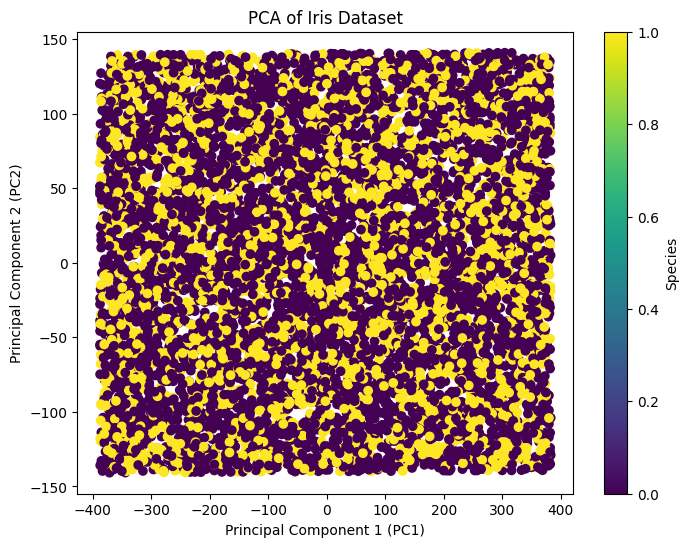

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Apply PCA with 2 components (reducing to 2 dimensions)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)

# Explained variance ratio (percentage of variance captured by each component)
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained variance ratio (first two components): {explained_variance_ratio}")

# Create a DataFrame with the reduced dimensions
df_reduced = pd.DataFrame(X_reduced, columns=["PC1", "PC2"])

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced["PC1"], df_reduced["PC2"], c=y, cmap="viridis")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA of Iris Dataset")
plt.colorbar(label="Species")
plt.show()


In [24]:
df_reduced.head()

,PC1,PC2
0,-131.543874,-52.220662
1,-182.935087,128.787903
2,169.187035,64.584966
3,-39.930313,122.958848
4,-186.809699,57.655929


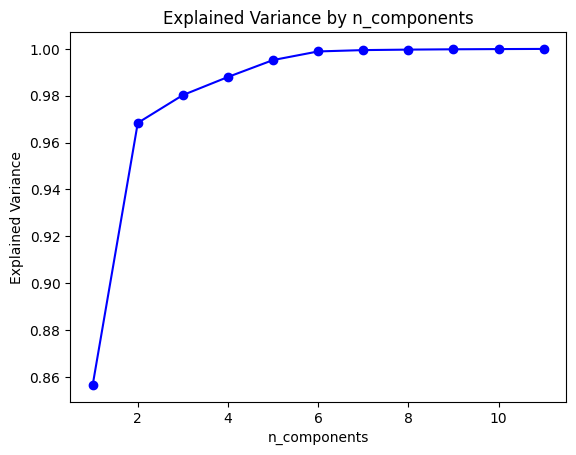

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

n_components_range = np.arange(1, x.shape[1] + 1)

explained_variance = []

for n in n_components_range:
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(x)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, explained_variance, 'bo-')
plt.xlabel('n_components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by n_components')
plt.show()

In [26]:
#Split the data to Train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_reduced, y, test_size=0.33, random_state=42)

In [27]:
#Prediction function
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

def predict(ml_model):
    model = ml_model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f'Predictions: {pred}')
    print('\n')
    print(f'Training Score: {model.score(x_train, y_train)}')
    print('\n')
    
    print('\n')
    print("Classification Report:")
    print(classification_report(pred, y_test))
    print('\n')
    print(f'Accuracy Score: {accuracy_score(pred, y_test)}')
    print(f'Mean Squared Error: {mean_squared_error(pred, y_test)}')
#     print(f'AUC Score: {roc_auc_score(pred, y_test)}')

    
    plt.figure(figsize=(4,2))
    sns.kdeplot(pred, shade=True)
    sns.kdeplot(y_test, shade=True)
    plt.legend(['pred', 'y_test'])
    
        # Plot confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix( y_test,pred)
    print(cm)
    
    print('\n')
    plt.show()

Predictions: [1 1 0 ... 0 0 1]


Training Score: 1.0




Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1843
           1       0.37      0.36      0.37      1049

    accuracy                           0.54      2892
   macro avg       0.50      0.50      0.50      2892
weighted avg       0.54      0.54      0.54      2892



Accuracy Score: 0.543222683264177
Mean Squared Error: 0.45677731673582295
[[1190  668]
 [ 653  381]]




C:\Users\Mohasnik\AppData\Local\Temp\ipykernel_30064\2074249351.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred, shade=True)
C:\Users\Mohasnik\AppData\Local\Temp\ipykernel_30064\2074249351.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, shade=True)


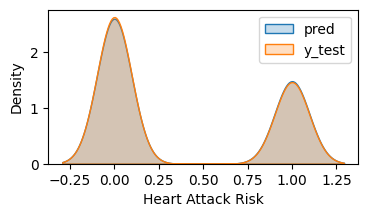

In [28]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

predict(tree)

Predictions: [1 0 0 ... 0 0 1]


Training Score: 0.999659342531085




Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      2175
           1       0.25      0.36      0.30       717

    accuracy                           0.57      2892
   macro avg       0.50      0.50      0.50      2892
weighted avg       0.63      0.57      0.60      2892



Accuracy Score: 0.5743430152143845
Mean Squared Error: 0.4256569847856155


C:\Users\Mohasnik\AppData\Local\Temp\ipykernel_30064\2074249351.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred, shade=True)


[[1401  457]
 [ 774  260]]




C:\Users\Mohasnik\AppData\Local\Temp\ipykernel_30064\2074249351.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, shade=True)


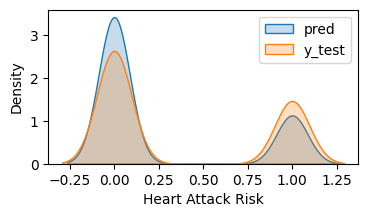

In [29]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

predict(forest)

Predictions: [1 0 0 ... 0 0 0]


Training Score: 0.7238971214443877




Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      2166
           1       0.24      0.33      0.28       726

    accuracy                           0.56      2892
   macro avg       0.49      0.48      0.48      2892
weighted avg       0.61      0.56      0.58      2892



Accuracy Score: 0.5594744121715076
Mean Squared Error: 0.4405255878284924
[[1375  483]
 [ 791  243]]




C:\Users\Mohasnik\AppData\Local\Temp\ipykernel_30064\2074249351.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred, shade=True)
C:\Users\Mohasnik\AppData\Local\Temp\ipykernel_30064\2074249351.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, shade=True)


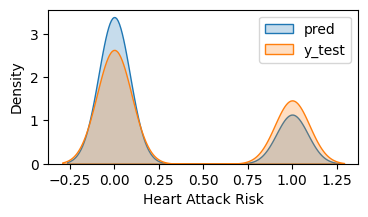

In [30]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

predict(knn)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from category_encoders import LeaveOneOutEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'catboost'

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [ ]:
model_list = [LinearSVC(), LogisticRegression(), GradientBoostingClassifier(), MLPClassifier(),
              AdaBoostClassifier(), HistGradientBoostingClassifier(), SVC(), XGBRFClassifier(),
              CatBoostClassifier(verbose=False)]

roc_auc_list = []
accuracy_list = []

for model in model_list: 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    roc_auc_list.append(roc_auc)
    accuracy_list.append(accuracy)
    
    print(f'Model Name: {model}')
    print(f'AUC ROC score is: {roc_auc:.3f}')
    print(f"accuracy score is: {accuracy:.3f}")
    print("\n", "-" * 50)

Model Name: LinearSVC()
AUC ROC score is: 0.500
accuracy score is: 0.642

 --------------------------------------------------
Model Name: LogisticRegression()
AUC ROC score is: 0.500
accuracy score is: 0.642

 --------------------------------------------------
Model Name: GradientBoostingClassifier()
AUC ROC score is: 0.502
accuracy score is: 0.636

 --------------------------------------------------
Model Name: MLPClassifier()
AUC ROC score is: 0.507
accuracy score is: 0.577

 --------------------------------------------------
Model Name: AdaBoostClassifier()
AUC ROC score is: 0.496
accuracy score is: 0.631

 --------------------------------------------------
Model Name: HistGradientBoostingClassifier()
AUC ROC score is: 0.507
accuracy score is: 0.623

 --------------------------------------------------
Model Name: SVC()
AUC ROC score is: 0.500
accuracy score is: 0.642

 --------------------------------------------------
Model Name: XGBRFClassifier(base_score=None, booster=None, callb

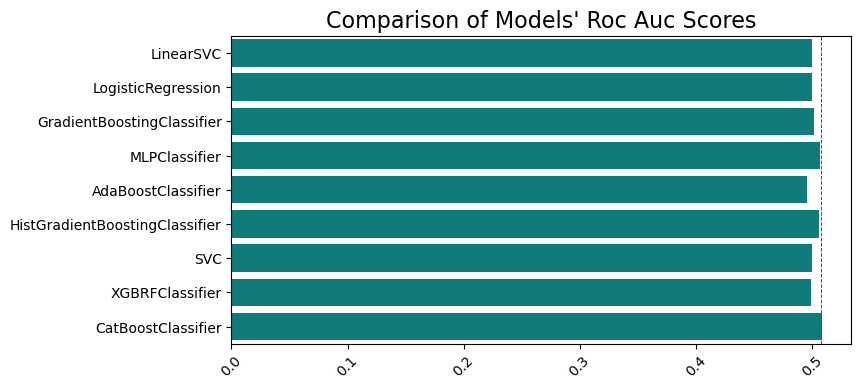

In [ ]:
models = ["LinearSVC", "LogisticRegression", "GradientBoostingClassifier", "MLPClassifier",
        "AdaBoostClassifier", "HistGradientBoostingClassifier", "SVC", "XGBRFClassifier",
          "CatBoostClassifier"]

plt.figure(figsize=(8,4))
sns.barplot(x=roc_auc_list, y=models, color="#008b8b")
plt.xticks(rotation=45)
plt.axvline(x=0.508, lw=0.7, color="r", ls="--")
plt.title("Comparison of Models' Roc Auc Scores", fontsize=16)
plt.show()

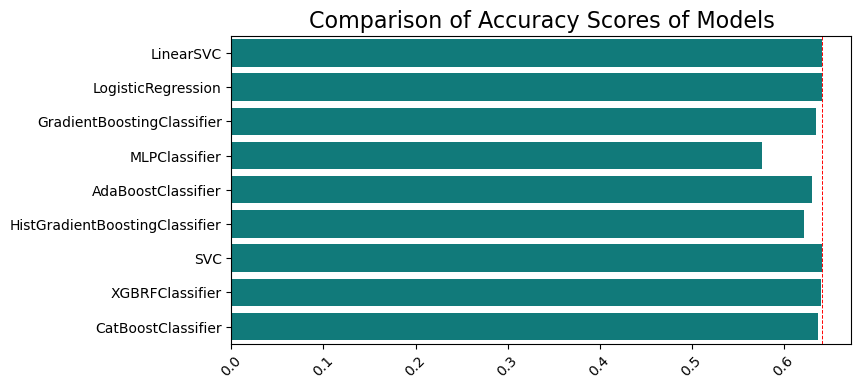

In [ ]:
models = ["LinearSVC", "LogisticRegression", "GradientBoostingClassifier", "MLPClassifier",
    "AdaBoostClassifier", "HistGradientBoostingClassifier", "SVC", "XGBRFClassifier", "CatBoostClassifier"]

plt.figure(figsize=(8,4))
sns.barplot(x=accuracy_list, y=models, color="#008b8b")
plt.xticks(rotation=45)
plt.axvline(x=0.64168886, lw=0.7, color="r", ls="--")
plt.title("Comparison of Accuracy Scores of Models", fontsize=16)
plt.show()

In [ ]:
x.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Blood_Sistolik_Pres,Blood_Diyastolik _Pres
0,0.625557,0.658765,-0.641579,-0.147042,-1.369651,-0.986061,0.339157,-1.002857,-1.219867,-1.010838,...,1.280130,0.373454,-0.588539,-1.528843,-0.514750,-1.620793,1.609515,1.350571,0.870044,0.193782
1,-1.539322,0.658765,1.596895,1.118179,0.730113,1.014136,0.339157,0.997151,0.819762,-1.418027,...,1.582523,-0.268479,-0.816487,-1.090738,-0.011823,-1.102536,0.983525,-0.740428,1.135714,0.534480
2,-1.539322,-1.517992,0.793023,-0.147042,0.730113,-0.986061,-2.948488,-1.002857,-1.219867,-1.372188,...,0.955917,-0.113134,0.756800,0.223577,-1.520604,-0.584279,0.357535,-0.740428,1.477290,0.943319
3,1.425621,0.658765,1.522691,-0.098380,0.730113,1.014136,0.339157,-1.002857,0.819762,-0.032188,...,-0.404902,1.198524,-0.177339,-0.214528,-1.520604,-1.102536,0.983525,-0.740428,1.059809,1.011458
4,0.578495,0.658765,0.718820,0.874867,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.727941,...,0.028445,-1.120826,-0.834365,-1.090738,-1.017677,1.143245,-0.894445,-0.740428,-1.672797,0.193782


In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [ ]:
nn = tf.keras.Sequential([
    tfl.Dense(units=45, activation='relu', input_shape = (25,)),
    #tfl.Dropout(.3),
    #tfl.Dense(units=45, activation='relu'),
    #tfl.Dropout(.3),
    tfl.Dense(1, activation='sigmoid')
])

In [ ]:
#Split the data to Train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64

In [ ]:
nn.compile(optimizer='Nadam', 
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = nn.fit(
    x = x_train,
    y = y_train,
    epochs=35)

Epoch 1/35
220/220 [==============================] - 1s 770us/step - loss: 0.6705 - accuracy: 0.6271
Epoch 2/35
220/220 [==============================] - 0s 770us/step - loss: 0.6526 - accuracy: 0.6431
Epoch 3/35
220/220 [==============================] - 0s 765us/step - loss: 0.6473 - accuracy: 0.6445
Epoch 4/35
220/220 [==============================] - 0s 774us/step - loss: 0.6437 - accuracy: 0.6456
Epoch 5/35
220/220 [==============================] - 0s 756us/step - loss: 0.6411 - accuracy: 0.6478
Epoch 6/35
220/220 [==============================] - 0s 765us/step - loss: 0.6384 - accuracy: 0.6481
Epoch 7/35
220/220 [==============================] - 0s 783us/step - loss: 0.6363 - accuracy: 0.6496
Epoch 8/35
220/220 [==============================] - 0s 770us/step - loss: 0.6342 - accuracy: 0.6506
Epoch 9/35
220/220 [==============================] - 0s 833us/step - loss: 0.6326 - accuracy: 0.6509
Epoch 10/35
220/220 [==============================] - 0s 847us/step - loss: 0.630

In [ ]:
nn.evaluate(x_test, y_test)

55/55 [==============================] - 0s 923us/step - loss: 0.7147 - accuracy: 0.5568


[0.7147294282913208, 0.5567598342895508]

In [ ]:
y_pred = nn.predict(x_test)

55/55 [==============================] - 0s 609us/step


In [ ]:
j = 0
for i in y_pred:
    if(i > 0.5):
        i=1
        y_pred[j] = i
        j = j + 1
    else:
        i=0
        y_pred[j] = i
        j = j + 1



In [ ]:
len(y_test)

1753

In [ ]:
test= y_test.to_numpy()

In [ ]:
test[11]

0

In [ ]:
int(y_pred[122])

0

In [ ]:
z = 0
for i in range(0, len(y_test)):
    if int(test[i]) - int(y_pred[i]) == 0:
        z=z+1
        
print(z)
        

976


In [ ]:
1023/1753

0.5835710211066742